In [1]:
#pip install lifelines
#pip install sklearn_pandas
#pip install torchtuples
#pip install pycox

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

import torch
import torchtuples as tt

from pycox.datasets import metabric
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv

In [4]:
data_cox=pd.read_excel('/Users/r.shyaamprasadh/Downloads/default_data.xlsx')  

In [5]:
data_cox.columns

Index(['residual_value', 'sco1_pop_final', 'Term', 'amount', 'origterm',
       'year', 'odefind', 'exposure1', 'advance_pct', 'Origination time',
       'balance time', 'current_bal', 'Term_1', 'check', 'start', 'id',
       'stop'],
      dtype='object')

In [6]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

T = data_cox["exposure1"]
E = data_cox["odefind"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 100325 total observations, 99517 right-censored observations>

(0.0, 100.0)

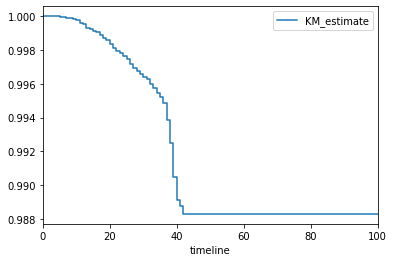

In [7]:
ax = kmf.plot(ci_show=False)
ax.set_xlim(0,100)

In [8]:
data_cox_1=data_cox.drop(['origterm', 'Origination time','check','Term'], axis = 1)

In [9]:
from lifelines import CoxTimeVaryingFitter

cox_tv = CoxTimeVaryingFitter(penalizer=0.1)
cox_tv.fit(data_cox_1, id_col='id', event_col='odefind',start_col='start', stop_col='stop', show_progress=True, step_size=1)

#Iteration 30: norm_delta = 0.00000, step_size = 1.00000, ll = -179884.48600, 
#newton_decrement = 0.00000, seconds_since_start = 207.0
#Convergence completed after 30 iterations.

Iteration 3: norm_delta = 0.00000, step_size = 1.00000, ll = -5907.64799, newton_decrement = 0.00000, seconds_since_start = 0.2Convergence completed after 3 iterations.


<lifelines.CoxTimeVaryingFitter: fitted with 100325 periods, 100325 subjects, 808 events>

In [10]:
cox_tv.print_summary()

<lifelines.CoxTimeVaryingFitter: fitted with 100325 periods, 100325 subjects, 808 events>
         event col = 'odefind'
         penalizer = 0.1
number of subjects = 100325
 number of periods = 100325
  number of events = 808
partial log-likelihood = -5907.65
  time fit was run = 2021-11-21 03:47:42 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
residual_value   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
sco1_pop_final  -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
amount           0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
year            -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
exposure1       -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
advance_pct      0.19       1.21       0.05             0.09             0.29                 1.09                 1.34
balance time    -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
current_bal     -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Term_1          -0.04       0.96       0.03            -0.09             0.01                 0.91                 1.01

                   z      p   -log2(p)
covariate                             
residual_value  1.98   0.05       4.41
sco1_pop_final -2.29   0.02       5.51
amount          3.27 <0.005       9.84
year           -4.19 <0.005      15.14
exposure1      -7.13 <0.005      39.81
advance_pct     3.60 <0.005      11.60
balance time   -0.01   0.99       0.01
current_bal    -0.59   0.55       0.85
Term_1         -1.45   0.15       2.78
---
Partial AIC = 11833.30
log-likelihood ratio test = 105.37 on 9 df
-log2(p) of ll-ratio test = 59.43

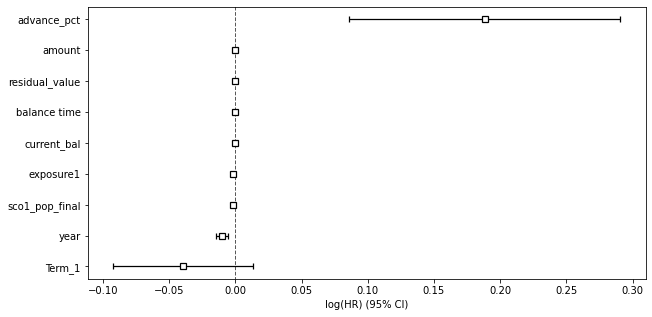

In [11]:
plt.figure(figsize=(10,5))
cox_tv.plot()
plt.show()

### Introduction to pycox

In [31]:
import torch # For building the networks 
import torchtuples as tt # Some useful functions

In [32]:
from pycox.models import LogisticHazard
# from pycox.models import PMF
# from pycox.models import DeepHitSingle
from pycox.evaluation import EvalSurv

In [33]:
np.random.seed(1234)
_ = torch.manual_seed(123)

In [34]:
data_cox.head(5)

,residual_value,sco1_pop_final,Term,amount,origterm,year,odefind,exposure1,advance_pct,Origination time,balance time,current_bal,Term_1,check,start,id,stop
0,10330,99.7,36,15460,36,2006,0,140,0.653423,156,119,0,0,1,118,1,119
1,10282,97.8,36,13955,36,2006,0,140,0.777221,156,119,0,0,2,118,2,119
2,10328,99.3,36,15730,36,2006,0,140,0.750477,157,121,0,0,3,120,3,121
3,3016,0.0,36,7243,36,2006,0,140,0.936514,156,119,0,0,4,118,4,119
4,12949,99.9,36,17020,36,2006,0,140,0.566955,157,119,0,0,5,118,5,119


In [35]:
data_cox['Term'].value_counts()

36    85159
24    15166
Name: Term, dtype: int64

In [36]:
data_cox['Term_1'].value_counts()

0    85159
1    15166
Name: Term_1, dtype: int64

In [37]:
data_cox

,residual_value,sco1_pop_final,Term,amount,origterm,year,odefind,exposure1,advance_pct,Origination time,balance time,current_bal,Term_1,check,start,id,stop
0,10330,99.70,36,15460,36,2006,0,140,0.653423,156,119,0,0,1,118,1,119
1,10282,97.80,36,13955,36,2006,0,140,0.777221,156,119,0,0,2,118,2,119
2,10328,99.30,36,15730,36,2006,0,140,0.750477,157,121,0,0,3,120,3,121
3,3016,0.00,36,7243,36,2006,0,140,0.936514,156,119,0,0,4,118,4,119
4,12949,99.90,36,17020,36,2006,0,140,0.566955,157,119,0,0,5,118,5,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100320,4378,99.81,36,7000,36,2020,0,3,0.327256,17,1447,7008,0,100321,1446,100321,1447
100321,12075,99.61,36,19530,36,2020,0,3,1.000000,18,1447,19544,0,100322,1446,100322,1447
100322,12725,99.07,36,21073,36,2020,0,3,1.000000,18,1447,20357,0,100323,1446,100323,1447
100323,15000,99.04,36,28832,36,2020,0,3,0.636019,18,1447,28041,0,100324,1446,100324,1447


In [38]:
df_train=data_cox
df_test = df_train.sample(frac=0.2)
df_train = df_train.drop(df_test.index)
df_val = df_train.sample(frac=0.2)
df_train = df_train.drop(df_val.index)

In [39]:
df_train.shape

(64208, 17)

In [40]:
df_val.shape

(16052, 17)

In [41]:
df_test.shape

(20065, 17)

In [42]:
df_train.head()

,residual_value,sco1_pop_final,Term,amount,origterm,year,odefind,exposure1,advance_pct,Origination time,balance time,current_bal,Term_1,check,start,id,stop
1,10282,97.8,36,13955,36,2006,0,140,0.777221,156,119,0,0,2,118,2,119
2,10328,99.3,36,15730,36,2006,0,140,0.750477,157,121,0,0,3,120,3,121
3,3016,0.0,36,7243,36,2006,0,140,0.936514,156,119,0,0,4,118,4,119
5,8431,98.1,36,18113,36,2006,0,140,0.783672,157,119,0,0,6,118,6,119
6,7852,99.6,36,16060,36,2006,0,140,0.653909,157,120,0,0,7,119,7,120


In [43]:
data_cox.columns

Index(['residual_value', 'sco1_pop_final', 'Term', 'amount', 'origterm',
       'year', 'odefind', 'exposure1', 'advance_pct', 'Origination time',
       'balance time', 'current_bal', 'Term_1', 'check', 'start', 'id',
       'stop'],
      dtype='object')

In [44]:
cols_standardize = ['residual_value', 'sco1_pop_final', 'amount','Origination time','balance time','current_bal']
cols_leave = ['year', 'odefind','Term_1','exposure1']

standardize = [([col], StandardScaler()) for col in cols_standardize]
leave = [(col, None) for col in cols_leave]

x_mapper = DataFrameMapper(standardize + leave)

In [45]:
x_mapper

DataFrameMapper(drop_cols=[],
                features=[(['residual_value'], StandardScaler()),
                          (['sco1_pop_final'], StandardScaler()),
                          (['amount'], StandardScaler()),
                          (['Origination time'], StandardScaler()),
                          (['balance time'], StandardScaler()),
                          (['current_bal'], StandardScaler()), ('year', None),
                          ('odefind', None), ('Term_1', None),
                          ('exposure1', None)])

In [46]:
x_train = x_mapper.fit_transform(df_train).astype('float32')
x_val = x_mapper.transform(df_val).astype('float32')
x_test = x_mapper.transform(df_test).astype('float32')

In [47]:
x_train.shape

(64208, 10)

In [48]:
x_val.shape

(16052, 10)

In [49]:
x_test.shape

(20065, 10)

In [50]:
get_target = lambda df: (df['exposure1'].values, df['odefind'].values)
y_train = get_target(df_train)
y_val = get_target(df_val)
durations_test, events_test = get_target(df_test)
val = x_val, y_val

In [51]:
len(y_train)

2

In [52]:
len(val)

2

In [53]:
in_features = x_train.shape[1]
num_nodes = [32, 32]
out_features = 1
batch_norm = True
dropout = 0.1
output_bias = False

net = tt.practical.MLPVanilla(in_features, num_nodes, out_features, batch_norm,
                              dropout, output_bias=output_bias)

In [54]:
model = CoxPH(net, tt.optim.Adam)

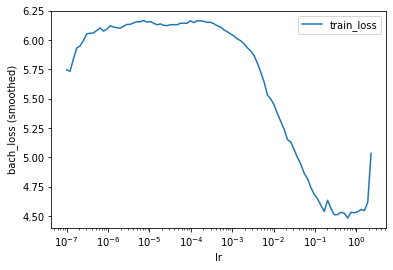

In [55]:
batch_size = 1024
lrfinder = model.lr_finder(x_train, y_train, batch_size, tolerance=10)
_ = lrfinder.plot()

In [56]:
lrfinder.get_best_lr()

0.0613590727341321

In [57]:
model.optimizer.set_lr(0.0001)

In [58]:
epochs = 256
callbacks = [tt.callbacks.EarlyStopping()]
verbose = True

In [59]:
%%time
log = model.fit(x_train, y_train, batch_size, epochs, callbacks, verbose,
                val_data=val, val_batch_size=batch_size)

0:	[0s / 0s],		train_loss: 5.8477,	val_loss: 5.6446
1:	[0s / 0s],		train_loss: 5.1028,	val_loss: 4.8867
2:	[0s / 0s],		train_loss: 4.1968,	val_loss: 3.9131
3:	[0s / 0s],		train_loss: 3.5502,	val_loss: 3.3612
4:	[0s / 1s],		train_loss: 3.3912,	val_loss: 3.1359
5:	[0s / 1s],		train_loss: 3.2222,	val_loss: 3.0797
6:	[0s / 1s],		train_loss: 3.1392,	val_loss: 3.0128
7:	[0s / 1s],		train_loss: 3.1125,	val_loss: 2.8485
8:	[0s / 2s],		train_loss: 3.0140,	val_loss: 2.7819
9:	[0s / 2s],		train_loss: 2.9382,	val_loss: 2.7861
10:	[0s / 2s],		train_loss: 2.8507,	val_loss: 2.5764
11:	[0s / 2s],		train_loss: 2.9089,	val_loss: 2.8538
12:	[0s / 3s],		train_loss: 2.7036,	val_loss: 2.5395
13:	[0s / 3s],		train_loss: 2.6560,	val_loss: 2.4669
14:	[0s / 3s],		train_loss: 2.6929,	val_loss: 2.4559
15:	[0s / 3s],		train_loss: 2.5413,	val_loss: 2.5430
16:	[0s / 4s],		train_loss: 2.5527,	val_loss: 2.1133
17:	[0s / 4s],		train_loss: 2.5433,	val_loss: 2.0447
18:	[0s / 4s],		train_loss: 2.3529,	val_loss: 2.2912
19:

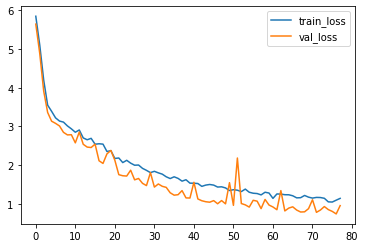

In [61]:
_ = log.plot()

In [62]:

model.partial_log_likelihood(*val).mean()

-3.2869935

In [63]:
_ = model.compute_baseline_hazards()

In [64]:
surv = model.predict_surv_df(x_test)

In [65]:
surv.shape

(138, 20065)

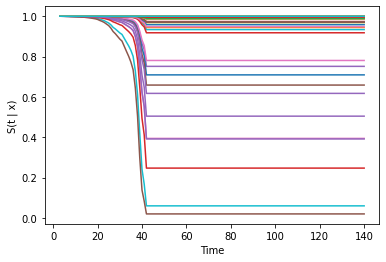

In [66]:
surv.iloc[:, :100].plot()
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.legend().set_visible(False)

In [67]:
ev = EvalSurv(surv, durations_test, events_test, censor_surv='km')

In [68]:
ev.concordance_td()

0.9990654390798518

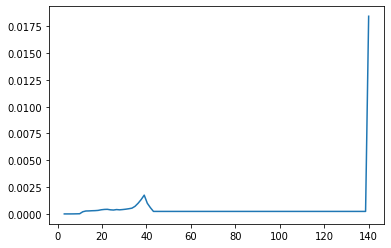

In [69]:
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
_ = ev.brier_score(time_grid).plot()

In [70]:
ev.integrated_brier_score(time_grid)

0.0003709662869544847

In [71]:

ev.integrated_nbll(time_grid)

0.0015319809100361338

In [72]:
df=surv.T

In [50]:
df.to_csv('/Users/r.shyaamprasadh/Downloads/survival_probabilites.csv')

In [51]:
x_test=pd.DataFrame(x_test)

In [52]:
x_test.to_csv('/Users/r.shyaamprasadh/Downloads/test_data.csv')

In [53]:
df_test.to_csv('/Users/r.shyaamprasadh/Downloads/test_data_1.csv')

### PCHazard

In [73]:
from pycox.models import CoxTime
from pycox.models import PCHazard
from pycox.models.cox_time import MLPVanillaCoxTime
from pycox.evaluation import EvalSurv

In [74]:
df_train=data_cox
df_test = df_train.sample(frac=0.2)
df_train = df_train.drop(df_test.index)
df_val = df_train.sample(frac=0.2)
df_train = df_train.drop(df_val.index)

In [75]:
df_train.shape

(64208, 17)

In [76]:
cols_standardize = ['residual_value', 'sco1_pop_final', 'amount','Origination time','balance time','current_bal']
cols_leave = ['year', 'odefind','Term_1','exposure1']

standardize = [([col], StandardScaler()) for col in cols_standardize]
leave = [(col, None) for col in cols_leave]

x_mapper = DataFrameMapper(standardize + leave)

In [77]:
x_train = x_mapper.fit_transform(df_train).astype('float32')
x_val = x_mapper.transform(df_val).astype('float32')
x_test = x_mapper.transform(df_test).astype('float32')

In [78]:
data_cox

,residual_value,sco1_pop_final,Term,amount,origterm,year,odefind,exposure1,advance_pct,Origination time,balance time,current_bal,Term_1,check,start,id,stop
0,10330,99.70,36,15460,36,2006,0,140,0.653423,156,119,0,0,1,118,1,119
1,10282,97.80,36,13955,36,2006,0,140,0.777221,156,119,0,0,2,118,2,119
2,10328,99.30,36,15730,36,2006,0,140,0.750477,157,121,0,0,3,120,3,121
3,3016,0.00,36,7243,36,2006,0,140,0.936514,156,119,0,0,4,118,4,119
4,12949,99.90,36,17020,36,2006,0,140,0.566955,157,119,0,0,5,118,5,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100320,4378,99.81,36,7000,36,2020,0,3,0.327256,17,1447,7008,0,100321,1446,100321,1447
100321,12075,99.61,36,19530,36,2020,0,3,1.000000,18,1447,19544,0,100322,1446,100322,1447
100322,12725,99.07,36,21073,36,2020,0,3,1.000000,18,1447,20357,0,100323,1446,100323,1447
100323,15000,99.04,36,28832,36,2020,0,3,0.636019,18,1447,28041,0,100324,1446,100324,1447


In [79]:
num_durations = 10
labtrans = PCHazard.label_transform(num_durations)
get_target = lambda data_cox: (data_cox['exposure1'].values, data_cox['odefind'].values)
y_train = labtrans.fit_transform(*get_target(df_train))
y_val = labtrans.transform(*get_target(df_val))
durations_test, events_test = get_target(df_test)
val = tt.tuplefy(x_val, y_val)

In [80]:
##https://arxiv.org/abs/1910.06724

In [81]:
type(labtrans)

pycox.preprocessing.label_transforms.LabTransPCHazard

In [82]:
y_train

(array([9, 9, 9, ..., 0, 0, 0]),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([1.        , 1.        , 1.        , ..., 0.21428572, 0.21428572,
        0.21428572], dtype=float32))

In [83]:
in_features = x_train.shape[1]
num_nodes = [32, 32]
out_features = labtrans.out_features
batch_norm = True
dropout = 0.1

net = tt.practical.MLPVanilla(in_features, num_nodes, out_features, batch_norm, dropout)

In [84]:
model = PCHazard(net, tt.optim.Adam, duration_index=labtrans.cuts)

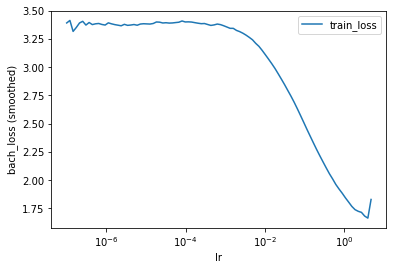

In [85]:
batch_size = 256
lr_finder = model.lr_finder(x_train, y_train, batch_size, tolerance=8)
_ = lr_finder.plot()

In [86]:
lr_finder.get_best_lr()

0.3944206059437682

In [87]:
model.optimizer.set_lr(0.001)

In [88]:
epochs = 100
callbacks = [tt.callbacks.EarlyStopping()]
log = model.fit(x_train, y_train, batch_size, epochs, callbacks, val_data=val)

0:	[0s / 0s],		train_loss: 1.2619,	val_loss: 0.4439
1:	[0s / 1s],		train_loss: 0.1703,	val_loss: 0.0533
2:	[0s / 2s],		train_loss: 0.0542,	val_loss: 1.5375
3:	[0s / 2s],		train_loss: 0.0298,	val_loss: 0.0385
4:	[0s / 3s],		train_loss: 0.0209,	val_loss: 0.0143
5:	[0s / 4s],		train_loss: 0.0174,	val_loss: 0.0595
6:	[0s / 5s],		train_loss: 0.0149,	val_loss: 0.0093
7:	[0s / 5s],		train_loss: 0.0126,	val_loss: 13.8563
8:	[0s / 6s],		train_loss: 0.0117,	val_loss: 0.0378
9:	[0s / 7s],		train_loss: 0.0109,	val_loss: 0.0505
10:	[0s / 7s],		train_loss: 0.0101,	val_loss: 5.8670
11:	[0s / 8s],		train_loss: 0.0100,	val_loss: 1.1072
12:	[0s / 9s],		train_loss: 0.0095,	val_loss: 1.7462
13:	[0s / 10s],		train_loss: 0.0090,	val_loss: 0.0312
14:	[0s / 10s],		train_loss: 0.0094,	val_loss: 0.0597
15:	[0s / 11s],		train_loss: 0.0089,	val_loss: 0.0113
16:	[0s / 12s],		train_loss: 0.0088,	val_loss: 0.0318


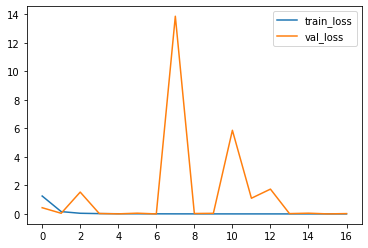

In [89]:
_ = log.plot()

In [108]:
surv =(model.predict_surv_df(x_test))

In [115]:
surv1=surv[10:40]

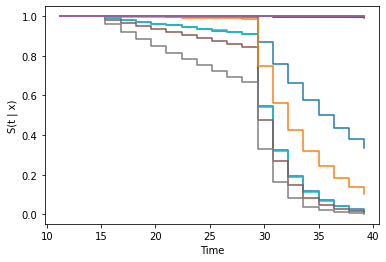

In [116]:
surv1.iloc[:, :25].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.legend().set_visible(False)

In [98]:
model.sub = 10

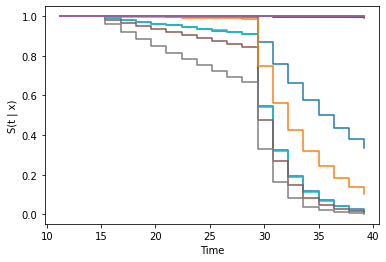

In [122]:
surv2 = model.predict_surv_df(x_test)
surv3=surv2[10:40]
surv3.iloc[:, :25].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.legend().set_visible(False)

In [123]:
ev = EvalSurv(surv, durations_test, events_test, censor_surv='km')

In [154]:
ev.concordance_td('antolini')

0.9993208060774752

## coxccmethod

In [156]:
from pycox.models import CoxCC
from pycox.evaluation import EvalSurv

In [159]:
get_target = lambda data_cox: (data_cox['exposure1'].values, data_cox['odefind'].values)
y_train = get_target(df_train)
y_val = get_target(df_val)
durations_test, events_test = get_target(df_test)
val = tt.tuplefy(x_val, y_val)

In [160]:
val.shapes()

((16052, 10), ((16052,), (16052,)))

In [161]:
val.repeat(2).cat().shapes()

((32104, 10), ((32104,), (32104,)))

In [162]:
in_features = x_train.shape[1]
num_nodes = [32, 32]
out_features = 1
batch_norm = True
dropout = 0.1
output_bias = False

net = tt.practical.MLPVanilla(in_features, num_nodes, out_features, batch_norm,
                              dropout, output_bias=output_bias)

In [163]:
model = CoxCC(net, tt.optim.Adam)

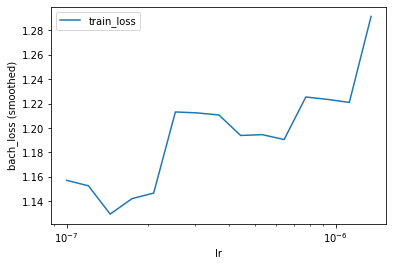

In [164]:
batch_size = 256
lrfinder = model.lr_finder(x_train, y_train, batch_size, tolerance=2)
_ = lrfinder.plot()

In [165]:
lrfinder.get_best_lr()

0.0001

In [167]:
model.optimizer.set_lr(0.0001)

In [177]:
epochs = 1024
callbacks = [tt.callbacks.EarlyStopping()]
verbose = True

In [178]:
%%time
log = model.fit(x_train, y_train, batch_size, epochs, callbacks, verbose,
                val_data=val.repeat(10).cat())

25:	[0s / 0s],		train_loss: 0.8537,	val_loss: 0.6277
26:	[0s / 0s],		train_loss: 0.9120,	val_loss: 0.6007
27:	[0s / 0s],		train_loss: 0.8930,	val_loss: 0.6504
28:	[0s / 0s],		train_loss: 0.9924,	val_loss: 0.7034
29:	[0s / 0s],		train_loss: 0.7772,	val_loss: 0.7265
30:	[0s / 0s],		train_loss: 0.8491,	val_loss: 0.7603
31:	[0s / 0s],		train_loss: 0.7778,	val_loss: 0.7848
32:	[0s / 0s],		train_loss: 0.9300,	val_loss: 0.7890
33:	[0s / 0s],		train_loss: 0.8453,	val_loss: 0.7700
34:	[0s / 0s],		train_loss: 0.9388,	val_loss: 0.7738
35:	[0s / 0s],		train_loss: 0.7828,	val_loss: 0.7695
36:	[0s / 0s],		train_loss: 0.8262,	val_loss: 0.7547
CPU times: user 293 ms, sys: 36.3 ms, total: 329 ms
Wall time: 247 ms


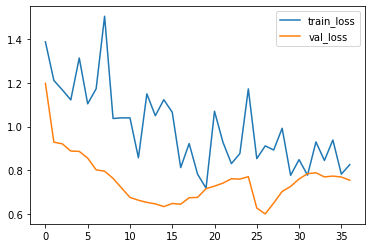

In [179]:
_ = log.plot()

In [180]:
model.partial_log_likelihood(*val).mean()

-9.110035

In [181]:
_ = model.compute_baseline_hazards()

In [182]:
surv = model.predict_surv_df(x_test)

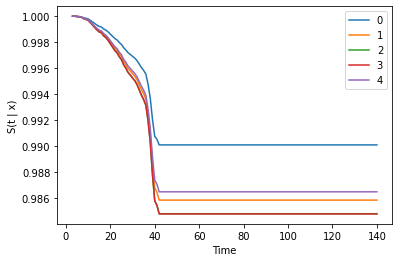

In [183]:
surv.iloc[:, :5].plot()
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')

In [184]:
ev = EvalSurv(surv, durations_test, events_test, censor_surv='km')

In [185]:
ev.concordance_td()

0.7981144259443937